In [1]:
import pandas as pd



In [2]:
df=pd.read_csv('Car_sales.csv')
df.head()
df.info()
df.shape
df.drop_duplicates()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

(157, 15)

In [3]:
df.shape
df.describe()
df.isnull().sum().idxmax()
df.drop_duplicates(inplace=True)
df.shape


(157, 15)

In [4]:
catColumns=df.select_dtypes(include=['object','category']).columns
catColumns
cleanDf=df.dropna(subset=catColumns)
cleanDf

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [5]:
priceCol=[col for col in df.columns if 'price' in col.lower()]

priceCol

for col in priceCol:
    df[col]=pd.to_numeric(df[col],errors='coerce')
  
sortedDf=df.sort_values(by=[priceCol[0]])
sortedDf
print(sortedDf.iloc[0:1,:])
print('\n')
print(sortedDf.iloc[-1:,:])


     Manufacturer              Model  Sales in thousands 4-year resale value  \
26  Chevrolet      Metro                          21.855                5.16   

   Vehicle type  Price in thousands Engine size Horsepower Wheelbase Width  \
26    Passenger               9.235           1         55      93.1  62.6   

   Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
26  149.4       1.895          10.3              45     13-Apr-14  


     Manufacturer              Model  Sales in thousands 4-year resale value  \
33  Chrysler       Town & Country                  53.48               19.54   

   Vehicle type  Price in thousands Engine size Horsepower Wheelbase Width  \
33          Car                 NaN           .          .         .     .   

   Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
33      .           .             .               .     13-Jul-15  


In [6]:
def fun(df,col):
  if col not in df:
    print("Error")
  else:
    max=df[col].max()
    min=df[col].min()

  return max,min


print(fun(df,'Price in thousands'))

(np.float64(85.5), np.float64(9.235))


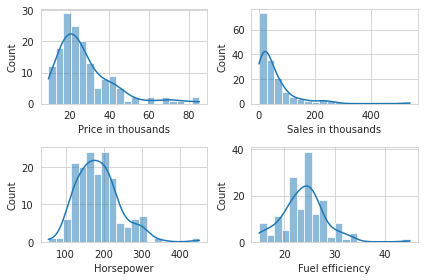

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=['Price in thousands','Sales in thousands','Horsepower','Fuel efficiency']

for col in cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')
  
sns.set_style('whitegrid')
# fig,axes = plt.subplots(2,2)
# axes.flatten()
for i,col in enumerate(cols):
    # ax=axes[i//2,i%2]
    plt.subplot(2,2,i+1)
    sns.histplot(df[col],bins=20,kde=True)
    # ax.set_title(col)
    # ax.set_xlabel(col)
    # ax.set_ylabel('Freq')

plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing  import LabelEncoder


df=pd.read_csv('Car_sales.csv')

y=df['Sales in thousands']
x=df.drop(columns='Sales in thousands')


In [14]:
from sklearn.model_selection import train_test_split

# First split: train (70%) + temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.30, random_state=42)

# Second split: test (10%) from the remaining 30%
X_test, _, y_test, _ = train_test_split(X_temp, y_temp, test_size=(2/3), random_state=42)  # 10% test set


In [16]:
from sklearn.preprocessing import StandardScaler

# Check numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns found:", numerical_cols.tolist())

if len(numerical_cols) > 0:
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
else:
    print("No numerical columns found to scale.")


Numerical columns found: []
No numerical columns found to scale.
